## Name: Vaishali

## Student Number: 200417634

## ***Email ID: vaishali61295@gmail.com***

### Encoding a message signal into the carrier signal to generate the original message by decoding function.

In this interactive python notebook, we will examine the process of encoding a text message into binary form and transmitting it with a carrier signal. Then using the decoding function get the original text message.

In [ ]:
import math
import struct
import numpy as np
from scipy import signal as sg
import matplotlib
import matplotlib.pyplot as plt
import binascii

### Part 1 :  Creating a Carrier Signal

Here, we are converting the ASCII message into a binary. To do so, we have to generate a string and continue to append each element of that string into our list.

In the binary characters, we get unnecessary spaces. So, we will get rid of them by checking and passing it over every time we encounter them.

Converting ascii message to binary form.

In [ ]:
asciiMessage = "good"
binMessage = ''.join(format(ord(x),'b')for x in asciiMessage)
binMessage

In [ ]:
message=[]
for bit in binMessage:
  message.append(int(bit))

Let us begin with creating a carrier signal. It will help in encoding the original text message into a transmissible signal. The carrier signal is usually a sinusoidal wave.
To do so, we will generate the sampling points for the carrier signal.

Now we have to figure out the period of the wave, which is done by dividing the number of samples by the number of cycles per bit.

Then, we get the total number of samples from the 'message' list.

In [ ]:
spb = 50 #samples per bit
cpb = 2 #cycles per bit
T = spb/cpb #period(in samples)
samples = spb*len(binMessage)  #Total Samples
samples

Now we will generate the carrier signal as we have determined the number of samples required to encode the original message. The amplitude of our carrier signal is 1, and the frequency is the number of samples per bit.

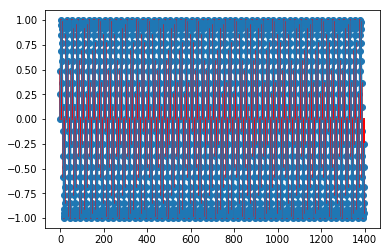

In [ ]:
x = np.arange(samples)
carrier = np.sin(2*np.pi*(1/T)*x)
%matplotlib inline
plt.stem(x,carrier, 'r')
plt.plot(x,carrier)


As we can see in the above graph, the carrier signal generates in the form of a simplistic sine wave. Here, the signal generated has an equal number of sample points as our message signal. Hence by multiplying both of them together, we will be able to produce the message signal.

### Part 2: Generating a Message Signal

Here, we will first generate the message signals. These signals are the amplitudes required to be multiplied by the carrier signal. 

In this encoding scheme, we have used '0' to be represented by f samples and amplitude be as the original amplitude of the carrier signal. And then to represent '1', taking threefold the amplitude of the original one.

We are using for loop and if-else to create a new message list.

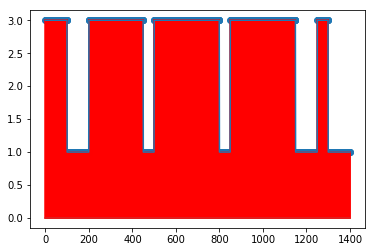

In [ ]:
messageList=[]
for bit in message:
  if bit is 0:
    for i in range(0,spb):
      messageList.append(1)
  else:
    for i in range(0,spb):
        messageList.append(3)
message = messageList

% matplotlib inline
# showing the exact location of the smaples
plt.stem(x,message, 'r' )
plt.plot(x,message)


The above graph is of a square wave as we have only two values present of message signal to represent i.e. 0 and 1. 

In [ ]:
len(messageList)

### Part 3: Creating a Transmission Signal

To generate a transmission signal, we will multiply the message and carrier signal.

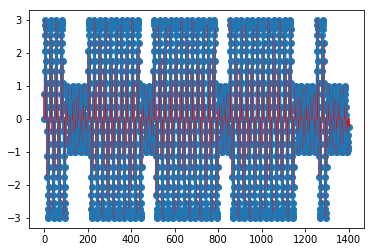

In [ ]:
import matplotlib.pyplot as plt
signal = carrier * messageList
%matplotlib inline
plt.stem(x,signal, 'r')
plt.plot(x,signal)


In [ ]:
sigList=[]
sigList=[signal,x]
sigList

We store the time and amplitude values in the variable form for comparing them in the X-Y graph.

In [ ]:
xvalue=sigList[1]
ReceivedSignal=sigList[0]

Here for decoding the message text, we determine the number of bits to send across the channel to compare across the total number of samples.

In [ ]:
bitssent=len(ReceivedSignal)/spb
bitssent

## **Part A: Make Some Noise**

We now introduce sound(noise) in the transmission channel by generating random numbers. Thus, the noise will get encoded with the original message. In C. E. Shannon's academic paper of A Mathematical Theory of Communication, he talks about the discrete channel with noise. Noise is something which is not a message and is some random quantity which interferes with the original message. Here we try to generate noise to our scheme after production of the carrier and message signals. During transmission, the noisy channel will interfere with the encoded message bits to create some chaos with the original message.

In [ ]:
import random
import numpy as np

 Here we generate sound(noise) which takes signal length and amplitude of it as an argument. The amplitude of the noise is the same as the carrier signal's amplitude, which is 1. And the signal length is the pulse code modulated signal's length. We normalize the amplitude value within the range -1 to 1 to generate noise. That approach produces random numbers which act as noise in our transmission channel.

 Here we use the trial and error method by changing SNR values. First, generate using 0.9 SNR and then calculate by changing amplitude values up to 0.1 SNR. Now analyze how good is our encoding scheme.
 

In [ ]:
amp  = 1         #amplitude of noise is same as carrier signal's amplitude

lengthSignal = len(signal)     #length of our pulse code modulated signal
print(len(signal))

#for x in range(lengthSignal):
 # print(2/np.random.randint(1,101))
  #noise=np.random.normal(0,1,100)

noise = (np.random.normal(0.2/-1,1,len(signal)))
#adding noise by generating a bunch of random numbers

#using Trial and Error method by changing noise amplitude from 0.9 to 0.1

#noise takes two arguments (noise amplitude and signal lenth) 
#and returns list of amplitudes by normalizing the values from -1 to 1

print("Random noise is:", noise)

## Part B - Cross the Streams!

So here we are attempting to determine if our existing encoding scheme is robust enough to bear the sound(noise) that we generate while it gives us the appropriate Signal to Noise Ratio(SNR). We are adding the amplitudes of the sound(noise) that are generated randomly to the signal. It takes the arguments of amplitude and signal's length.

In [ ]:
list=[]

for i in range(0,len(signal)-1):
  signal[i] = signal[i] + noise[i]
  list.append(signal)
  
print("The signal with noise is:", signal)

### **Part 2: Generating a Decode Function**

Now for selecting a decoding scheme, we will take a threshold value 1.5 as the amplitude of our transmitting wave. And compare it with the signal wave across x-axis of the transmitted wave. If these crossing received are higher than the threshold value then we append a '1' in the list otherwise a '0' will be placed.

In [ ]:
decmess = []
j=0
for v in range(0,int(bitssent)):
  co=0
  for value in signal[(v*spb)+0:(v+1)*spb]:      
    if value>1.5:
      co=co+1
  if co>2:  
    decmess.append(1)
  else:
    decmess.append(0)
decmess

Converting binary message to ascii.

In [ ]:
binMessage = bin(int.from_bytes(asciiMessage.encode(),'big'))

In [ ]:
n = int(binMessage,2)
n.to_bytes((n.bit_length()+7) // 8, 'big').decode()

'good'

We tested this scheme for alphabetical, numeric also special characters and it works well.
It is simple to code and easy to use an encoding scheme for the defined problem.

## Part C - Repeat and Analyze

Now that we determined the signal to noise ratio for ranges 0.9 to 0.1, we can analyze the scenario. When the ratio is 0.9, there is a negligible amount of noise produced. As we check for multiple values like 0.8, 0.7, 0.6, 0.5, 0.4, 0.3 and so on, we see that some bits of the decoded message get deteriorated. That is because when the SNR value decreases, the noise increases, and vice versa. Thus, affecting the decoding scheme along with the received message.

As we look at our decoded signal, we analyze that the ratio of received data to the original message varies on SNR. When the SNR approaches 0.9, the percentage is nearly 100, due to the generation of none or some noise. And as we observe multiple test cases in scope 0.6 to 0.1, we see that there is a deviation. The percentage correct as a function of SNR when we check for 0.3 is approximately 50. That is because essentially two bits are not sent as the original message.


We determine that by comparing the correctness in percentage as a function of SNR. We compare the number of correct bits and the total number of bits in our decoded message.


We can explain this by plotting a graph.

In [ ]:
percentageCorrect = []
count=0

binMessage = bin(int.from_bytes(asciiMessage.encode(),'big'))
n = int(binMessage,2)
new=n.to_bytes((n.bit_length()+7) //8, 'big').decode()
print(new)
for i in range(len(asciiMessage)):
  if asciiMessage[i] == new[i]:
    count=count+1
    percentageCorrect.append(100*(count/len(asciiMessage)))
    
print("percentage of correct:", percentageCorrect)

In [ ]:
percentageCorrect

Tabular form to represent values of percentage correct when using trial and error method with SNR values ranging from 0.9 to 0.1.
| % Correct  | SNR |
| ------------- | ------------- |
| 100         |    0.9       |
| 100         |    0.8       |
| 100         |    0.7       |
| 75           |    0.6       |
| 75           |    0.5       |
| 50           |    0.4       |
| 50           |    0.3       |
| 25           |    0.2       |
| 25           |    0.1       |


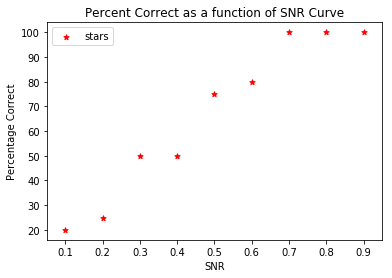

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# x-axis values 
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
# y-axis values 
y = [20,25,50,50,75,75,100,100,100]


# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "red",  
            marker= "*", s=30)

# y-axis label
plt.ylabel('Percentage Correct')

# x-axis label
plt.xlabel('SNR')

#plot title
plt.title('Percent Correct as a function of SNR Curve')

# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show()

## Part D - Discussion

 In a scenario where we inject noise with our transmission signal, we observe that our algorithm is not reasonably robust to handle it. As we increase the SNR value approaching 0.1, it gives us more failure in the decoded message. But we are able to recover the original text message for SNR values 0.7 and above . The received signal has a few errors, and we then calculate it's percent correctness in percentage as a function of SNR. When the value approaches 100, it implies that we get the original message. If the errors are high than the original message, then we can't decode the information, and the percentage of correct value nears 25.


It begins to suffer as the message transferred through the noisy channel is altered when it reaches the receiving end. The original message is difficult to identify and decode at receiving end after further generation of noise. So applying Forward Error Correcting scheme (FEC) will be helpful in such case.